In [1]:
# Instructions
# Choose a COVID-19 API of your choice that contains both valuable data and noise.
# Use Python to gather the data from the API and store it in a Pandas DataFrame.
# Clean the data by removing any irrelevant columns, null values, or duplicates.
# Pre-process the data by normalizing and scaling the numerical data.
# Perform EDA to identify trends, correlations, and patterns in the data. Use visualizations such as histograms, scatter plots, and heatmaps to help you understand the data better.
# Choose the best-suited supervised algorithm to predict the future number of cases. Use techniques such as train-test split, cross-validation, and grid search to optimize the model's performance.
# Once you have chosen the best-suited model, deploy it using Streamlit. Create a user-friendly interface that allows users to input data and view the model's predictions.
# Deploy your streamlit app with streamlit share


In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [2]:
from datetime import datetime 

In [5]:
germany = pd.read_csv('germany_covid_data.csv', index_col=[0])
italy = pd.read_csv('italy_covid_data.csv', index_col=[0])
southAfrica = pd.read_csv('Sa_covid_data.csv', index_col=[0])
uk = pd.read_csv('uk_covid_data.csv', index_col=[0])
us = pd.read_csv('Us_covid_data.csv', index_col=[0])

In [15]:
indexed_ger = germany.set_index(['Date'])
indexed_italy = italy.set_index(['Date'])
indexed_sa = southAfrica.set_index(['Date'])
indexed_uk = uk.set_index(['Date'])
indexed_us = us.set_index(['Date'])

In [6]:
germany['Date'] = pd.to_datetime(germany['Date']) # convert date column to datetime format
germany_monthly_data = germany.resample('M', on='Date').sum()
italy['Date'] = pd.to_datetime(italy['Date']) # convert date column to datetime format
italy_monthly_data = italy.resample('M', on='Date').sum()
southAfrica['Date'] = pd.to_datetime(southAfrica['Date']) # convert date column to datetime format
SA_monthly_data = southAfrica.resample('M', on='Date').sum()
uk['Date'] = pd.to_datetime(uk['Date']) # convert date column to datetime format
uk_monthly_data = uk.resample('M', on='Date').sum()
us['Date'] = pd.to_datetime(us['Date']) # convert date column to datetime format
us_monthly_data = us.resample('M', on='Date').sum()


In [5]:
germany_monthly_data.columns

Index(['Confirmed_Distinct', 'Deaths_Distinct', 'Recovered_Distinct',
       'Active_Distinct'],
      dtype='object')

In [7]:
ger = germany_monthly_data[['Deaths_Distinct']]
ital = italy_monthly_data[['Deaths_Distinct']]
Sa = SA_monthly_data[['Deaths_Distinct']]
ukk = uk_monthly_data[['Deaths_Distinct']]
usa = us_monthly_data[['Deaths_Distinct']]

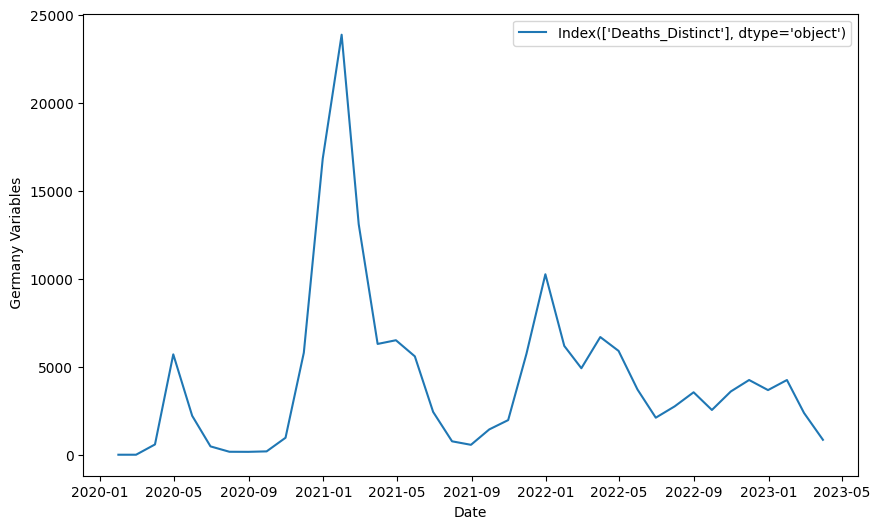

In [8]:
plt.xlabel("Date")
plt.ylabel(" Germany Variables")
plt.plot(ger, label = ger.columns)
plt.legend()

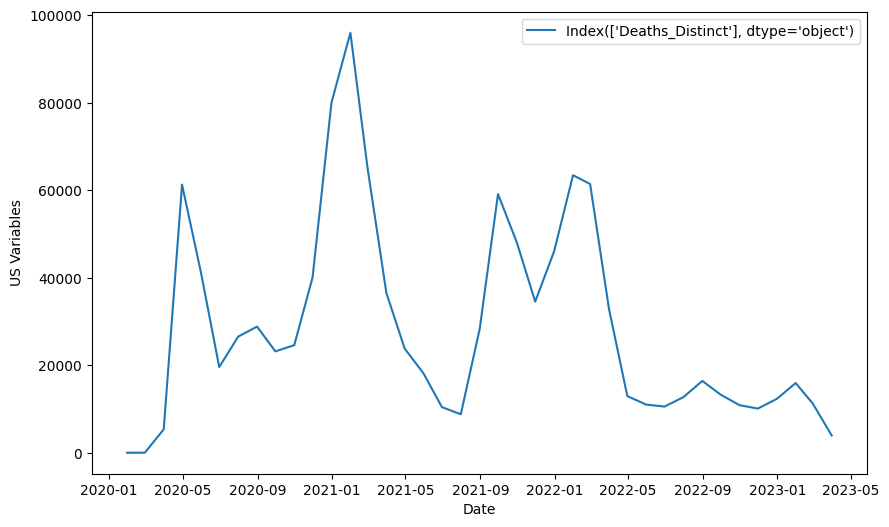

In [8]:
plt.xlabel("Date")
plt.ylabel("US Variables")
plt.plot(usa, label = usa.columns)
plt.legend()

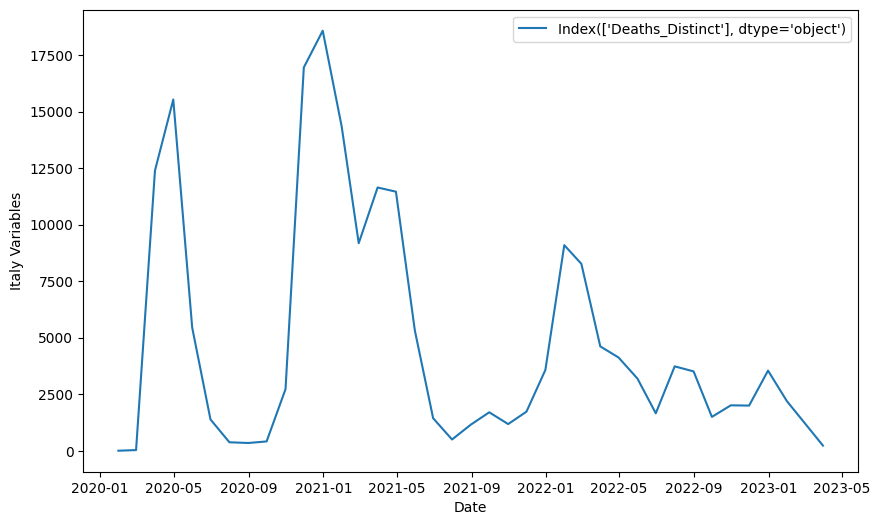

In [58]:
plt.xlabel("Date")
plt.ylabel("Italy Variables")
plt.plot(ital, label = ital.columns)
plt.legend()

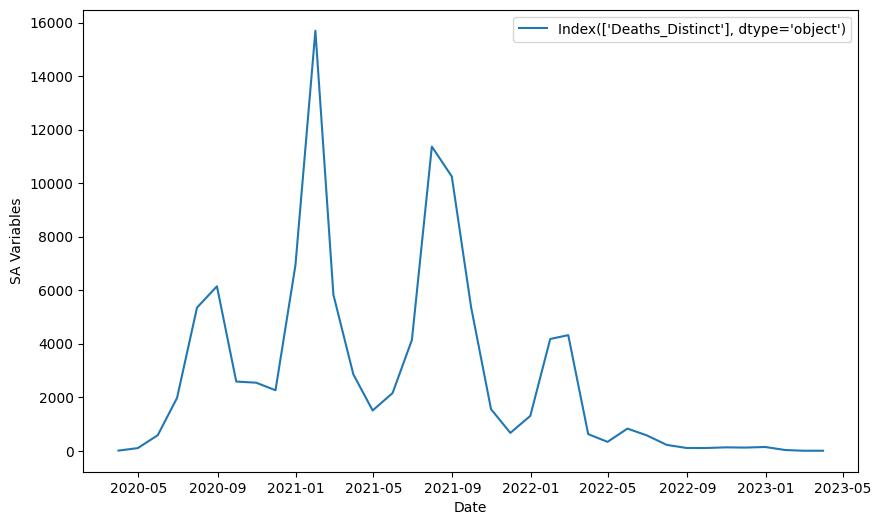

In [9]:
plt.xlabel("Date")
plt.ylabel("SA Variables")
plt.plot(Sa, label = Sa.columns)
plt.legend()

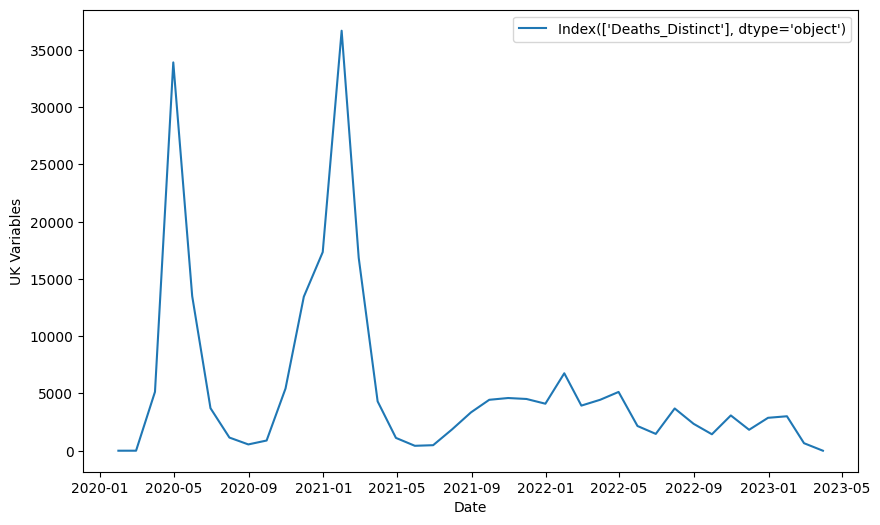

In [10]:
plt.xlabel("Date")
plt.ylabel("UK Variables")
plt.plot(ukk, label = ukk.columns)
plt.legend()

# Italy

In [12]:
ital.head(5)

,Deaths_Distinct
Date,
2020-01-31,0.0
2020-02-29,29.0
2020-03-31,12399.0
2020-04-30,15539.0
2020-05-31,5448.0


In [19]:
# Determine the rolling mean statistics 
it_rolling_mean = ital.rolling(window=12).mean()
it_rolling_std = ital.rolling(window =12).std()
# it_rolling_mean,it_rolling_std

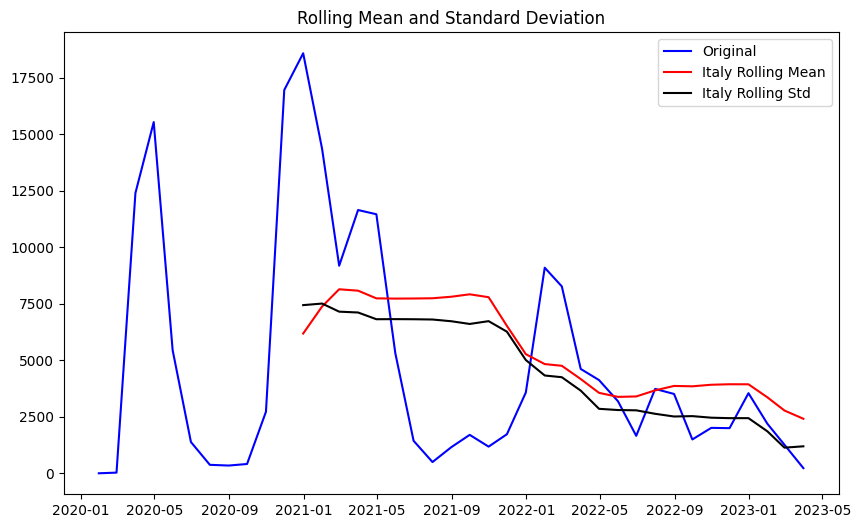

In [14]:
#plotting the rolling statistics
orig = plt.plot(ital,color = 'blue', label= 'Original')
mean = plt.plot(it_rolling_mean, color = 'red', label= 'Italy Rolling Mean')
std = plt.plot(it_rolling_std, color= 'black', label = 'Italy Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

In [21]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test:')
italy_dftest = adfuller(ital['Deaths_Distinct'], autolag = 'AIC')

italy_dfoutput = pd.Series(italy_dftest[0:4], index = ['Test Statistisc', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in italy_dftest[4].items():
    italy_dfoutput['Critical Value (%s) ' %key] = value

print(italy_dfoutput)

Results of Dickey-Fuller Test:
Test Statistisc                -2.879746
p-value                         0.047754
#Lags Used                      4.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


In [42]:
# Function for stationary test
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    # Determine the rolling mean statistics 
    moving_average= timeseries.rolling(window=12).mean()
    moving_std = timeseries.rolling(window =12).std()

    #plotting the rolling statistics
    orig = plt.plot(timeseries,color = 'blue', label= 'Original')
    mean = plt.plot(moving_average, color = 'red', label= 'Rolling Mean')
    std = plt.plot(moving_std, color= 'black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    # Perform Dickey-Fuller test:
    from statsmodels.tsa.stattools import adfuller

    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['Deaths_Distinct'], autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistisc', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s) ' %key] = value

    print(dfoutput)
    


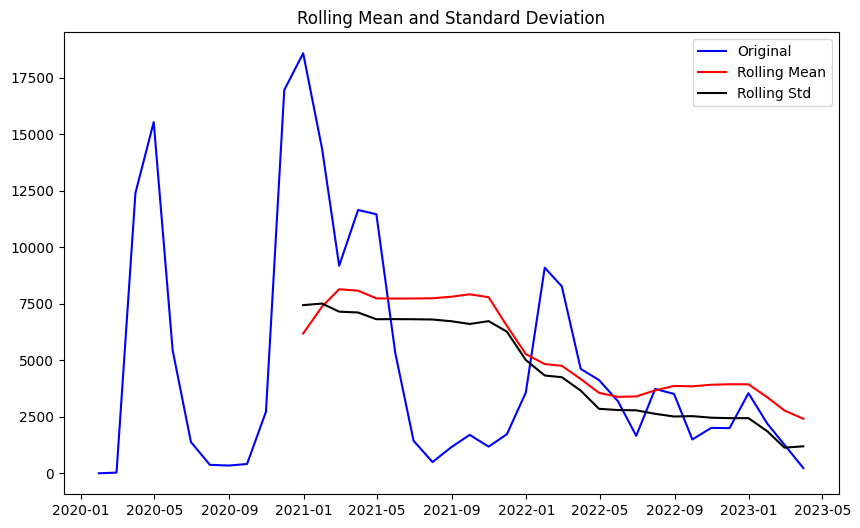

Results of Dickey-Fuller Test:
Test Statistisc                -2.879746
p-value                         0.047754
#Lags Used                      4.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


In [43]:
test_stationarity(ital)

In [32]:
import time

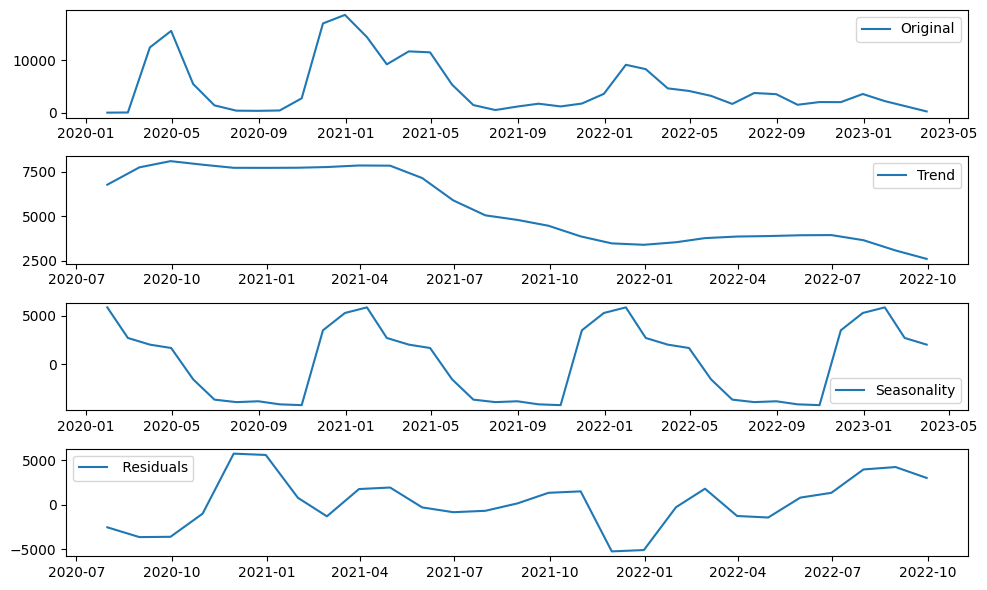

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ital)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ital, label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = ' Residuals')
plt.legend(loc = 'best')
plt.legend(loc='best')
plt.tight_layout()


In [44]:
decomposedData = residual
decomposedData.dropna(inplace = True)
test_stationarity(decomposedData)

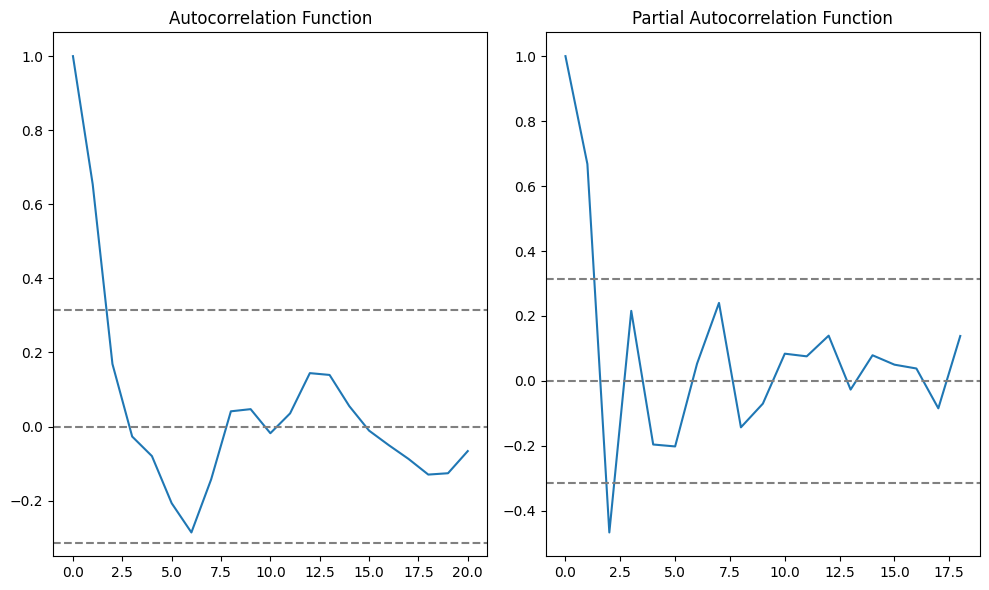

In [49]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ital, nlags =20)
lag_pacf = pacf(ital, nlags = 18, method= 'ols')

# plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(ital)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(ital)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

# plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(ital)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(ital)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# The PACF and ACF calculates the values of P and Q respectively


c:\Users\HP EliteBook\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


plotting AR model


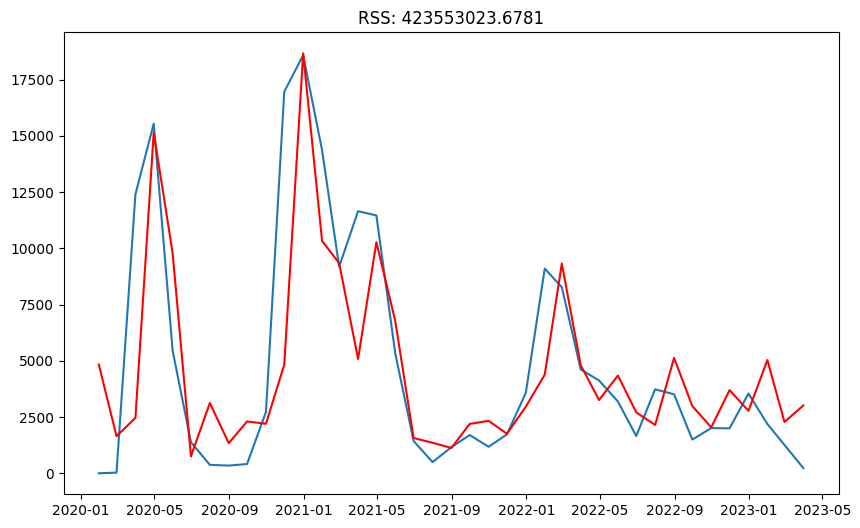

In [62]:
from statsmodels.tsa.arima.model import ARIMA

#   AR MODEL 
model = ARIMA(ital, order =(2,0,3))
results_AR = model.fit()
plt.plot(ital)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('RSS: %.4F'% sum((results_AR.fittedvalues-ital['Deaths_Distinct'])**2))
print('plotting AR model')

In [63]:
predicted = pd.Series(results_AR.fittedvalues, copy = True)
print(predicted.head())

Date
2020-01-31     4832.897515
2020-02-29     1647.785562
2020-03-31     2461.618558
2020-04-30    15147.862024
2020-05-31     9783.831368
Freq: M, dtype: float64


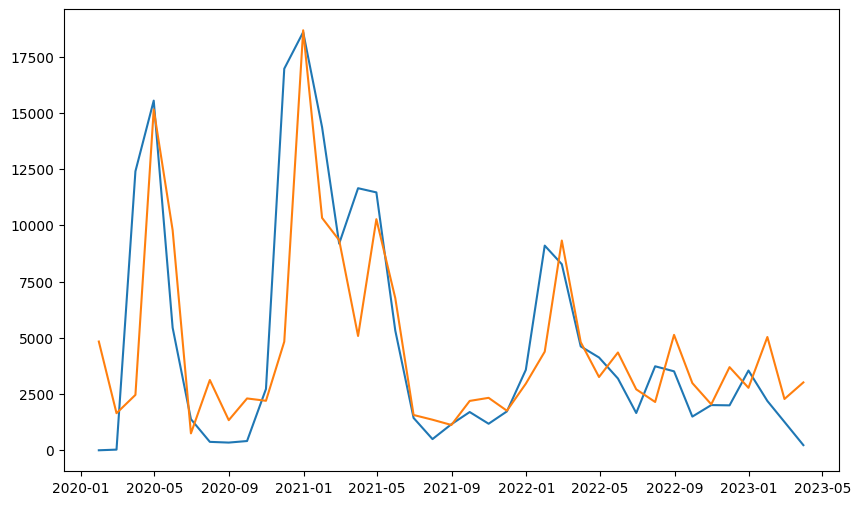

In [64]:
plt.plot(ital)
plt.plot(predicted)

In [65]:
ital.shape

(39, 1)

In [77]:
# plt.plot(results_AR.predict(1,99))
x = results_AR.forecast(36)

In [81]:
italy_prediction = pd.DataFrame(x)

In [100]:
italy_prediction.index = italy_prediction.index.astype(str)
italy_prediction.loc[italy_prediction.index.str[:4] == '2024']


,predicted_mean
2024-01-31,5569.779562
2024-02-29,5482.578327
2024-03-31,5405.660191
2024-04-30,5337.838326
2024-05-31,5278.044403
2024-06-30,5225.330288
2024-07-31,5178.858314
2024-08-31,5137.889491
2024-09-30,5101.772193
2024-10-31,5069.931917


# Germany

c:\Users\HP EliteBook\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\HP EliteBook\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


plotting AR model


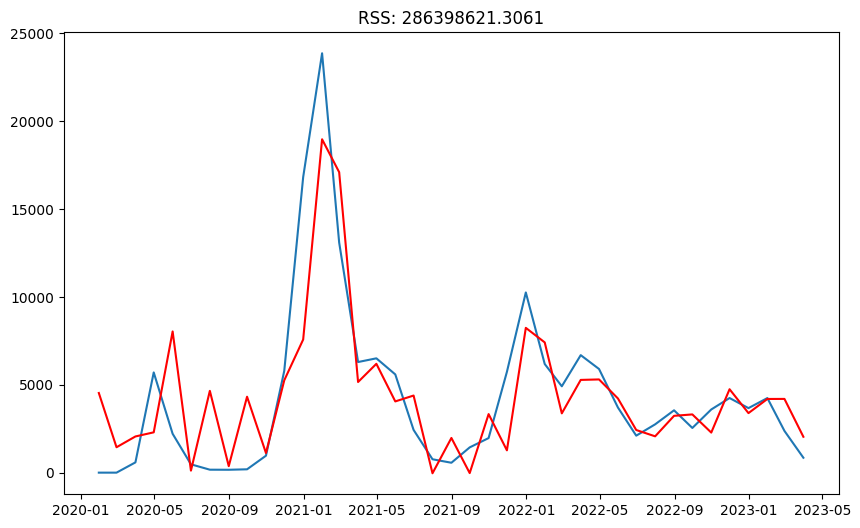

In [111]:
model = ARIMA(ger, order =(2,0,3))
results_AR = model.fit()
plt.plot(ger)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('RSS: %.4F'% sum((results_AR.fittedvalues-ger['Deaths_Distinct'])**2))
print('plotting AR model')

In [112]:
predicted = pd.Series(results_AR.fittedvalues, copy = True)
print(predicted.head())

Date
2020-01-31    4534.551594
2020-02-29    1445.927991
2020-03-31    2059.792965
2020-04-30    2294.924128
2020-05-31    8037.772738
Freq: M, dtype: float64


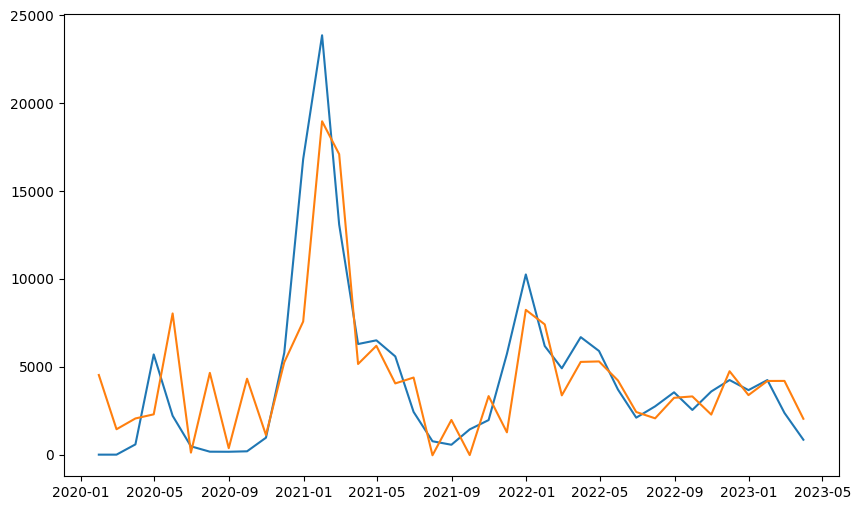

In [113]:
plt.plot(ger)
plt.plot(predicted)

In [114]:
x = results_AR.forecast(36)

In [115]:
ger_prediction = pd.DataFrame(x)

In [117]:
ger_prediction.index = ger_prediction.index.astype(str)
ger_prediction.loc[ger_prediction.index.str[:4] == '2023']

,predicted_mean
2023-04-30,2367.315050
2023-05-31,4107.515715
2023-06-30,4905.941522
2023-07-31,5405.623685
2023-08-31,5656.141409
2023-09-30,5715.036437
2023-10-31,5639.590218
2023-11-30,5481.330597
2023-12-31,5282.905430


# UK

c:\Users\HP EliteBook\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


plotting AR model


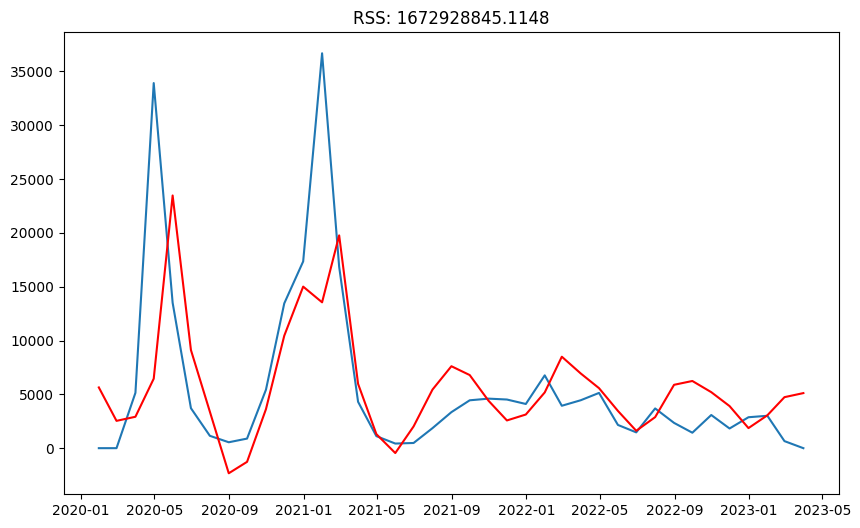

In [121]:
model = ARIMA(ukk, order =(2,0,3))
results_AR = model.fit()
plt.plot(ukk)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('RSS: %.4F'% sum((results_AR.fittedvalues-ukk['Deaths_Distinct'])**2))
print('plotting AR model')

In [122]:
predicted = pd.Series(results_AR.fittedvalues, copy = True)
print(predicted.head())

Date
2020-01-31     5644.073987
2020-02-29     2538.464132
2020-03-31     2919.065629
2020-04-30     6456.199490
2020-05-31    23474.431162
Freq: M, dtype: float64


In [123]:
x = results_AR.forecast(36)

In [124]:
ukk_prediction = pd.DataFrame(x)

In [125]:
ukk_prediction.index = ukk_prediction.index.astype(str)
ukk_prediction.loc[ukk_prediction.index.str[:4] == '2023']

,predicted_mean
2023-04-30,4574.445543
2023-05-31,5136.351066
2023-06-30,4157.391500
2023-07-31,4269.294581
2023-08-31,5289.164674
2023-09-30,6445.242483
2023-10-31,6951.181515
2023-11-30,6533.174540
2023-12-31,5562.212147


# south africa

c:\Users\HP EliteBook\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


plotting AR model


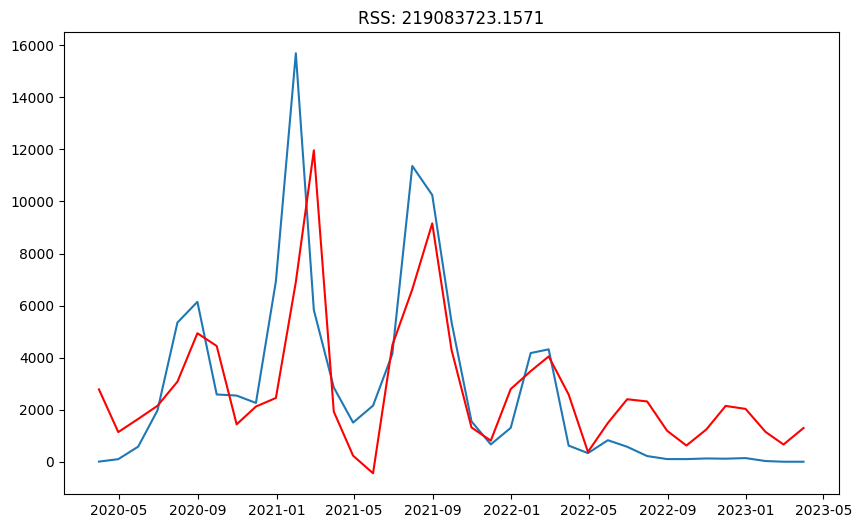

In [127]:
model = ARIMA(Sa, order =(2,0,3))
results_AR = model.fit()
plt.plot(Sa)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('RSS: %.4F'% sum((results_AR.fittedvalues-Sa['Deaths_Distinct'])**2))
print('plotting AR model')

In [128]:
predicted = pd.Series(results_AR.fittedvalues, copy = True)
print(predicted.head())

Date
2020-03-31    2780.468499
2020-04-30    1139.577324
2020-05-31    1644.903117
2020-06-30    2150.045404
2020-07-31    3075.893325
Freq: M, dtype: float64


In [130]:
x = results_AR.forecast(36)
sa_prediction = pd.DataFrame(x)
sa_prediction.index = sa_prediction.index.astype(str)
sa_prediction.loc[sa_prediction.index.str[:4] == '2023']

,predicted_mean
2023-04-30,2025.260752
2023-05-31,3337.009521
2023-06-30,3247.593905
2023-07-31,2679.666885
2023-08-31,2306.375380
2023-09-30,2490.941644
2023-10-31,2951.995621
2023-11-30,3160.488411
2023-12-31,2935.935833


# USA

c:\Users\HP EliteBook\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\HP EliteBook\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


plotting AR model


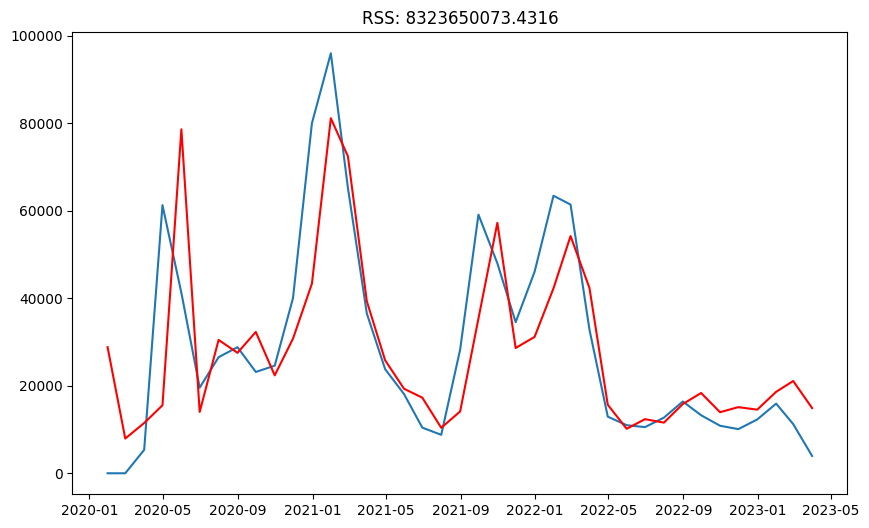

In [131]:
model = ARIMA(usa, order =(2,0,3))
results_AR = model.fit()
plt.plot(usa)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('RSS: %.4F'% sum((results_AR.fittedvalues-usa['Deaths_Distinct'])**2))
print('plotting AR model')

In [132]:
predicted = pd.Series(results_AR.fittedvalues, copy = True)
print(predicted.head())

Date
2020-01-31    28830.442131
2020-02-29     7938.272440
2020-03-31    11486.534171
2020-04-30    15540.271201
2020-05-31    78623.870902
Freq: M, dtype: float64


In [133]:
x = results_AR.forecast(36)
usa_prediction = pd.DataFrame(x)
usa_prediction.index = usa_prediction.index.astype(str)
usa_prediction.loc[usa_prediction.index.str[:4] == '2023']

,predicted_mean
2023-04-30,11684.092746
2023-05-31,24037.626615
2023-06-30,31002.751349
2023-07-31,34745.530912
2023-08-31,36431.786400
2023-09-30,36853.630445
2023-10-31,36540.165453
2023-11-30,35837.333390
2023-12-31,34965.064970


In [136]:
prediction = {'Germany': ger_prediction['predicted_mean'],
              'italy': italy_prediction['predicted_mean'],
              'South Africa': sa_prediction['predicted_mean'],
              'USA': usa_prediction['predicted_mean'],
              'UK': ukk_prediction['predicted_mean']}

In [137]:
prediction_df = pd.DataFrame(prediction, index=ger_prediction.index)

In [141]:
prediction_df.to_csv('Prediction.csv')

In [143]:
prediction_df.index

Index(['2023-04-30', '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
       '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31', '2024-01-31',
       '2024-02-29', '2024-03-31', '2024-04-30', '2024-05-31', '2024-06-30',
       '2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31', '2024-11-30',
       '2024-12-31', '2025-01-31', '2025-02-28', '2025-03-31', '2025-04-30',
       '2025-05-31', '2025-06-30', '2025-07-31', '2025-08-31', '2025-09-30',
       '2025-10-31', '2025-11-30', '2025-12-31', '2026-01-31', '2026-02-28',
       '2026-03-31'],
      dtype='object')

In [147]:
pred = pd.read_csv('Prediction.csv', index_col=[0])
pred

,Germany,italy,South Africa,USA,UK
2023-04-30,2367.315050,2367.315050,2025.260752,11684.092746,4574.445543
2023-05-31,4107.515715,4107.515715,3337.009521,24037.626615,5136.351066
2023-06-30,4905.941522,4905.941522,3247.593905,31002.751349,4157.391500
2023-07-31,5405.623685,5405.623685,2679.666885,34745.530912,4269.294581
2023-08-31,5656.141409,5656.141409,2306.375380,36431.786400,5289.164674
2023-09-30,5715.036437,5715.036437,2490.941644,36853.630445,6445.242483
2023-10-31,5639.590218,5639.590218,2951.995621,36540.165453,6951.181515
2023-11-30,5481.330597,5481.330597,3160.488411,35837.333390,6533.174540
2023-12-31,5282.905430,5282.905430,2935.935833,34965.064970,5562.212147
2024-01-31,5076.849202,5076.849202,2582.438044,34057.834224,4742.182277


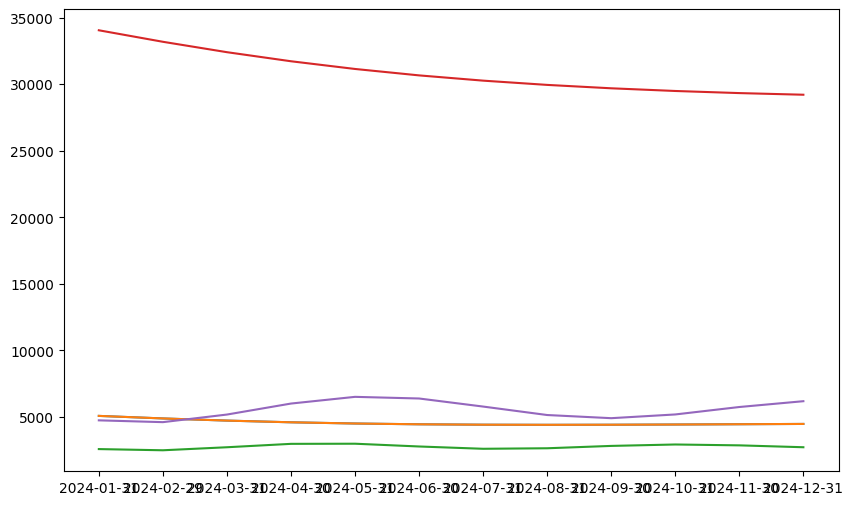

In [149]:
plt.plot(pred.loc[pred.index.str[:4] == '2024'])